In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
data = pd.read_csv("Bike_data/bikes.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Text(0.5, 1.0, 'Correlation plot')

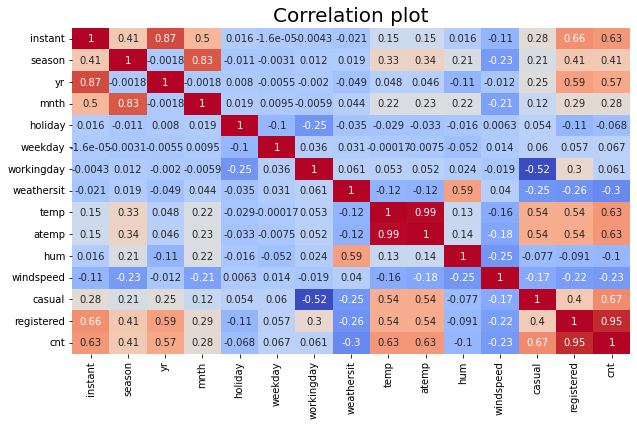

In [65]:
plt.figure(figsize=(10,6))
CORREL =data.corr()
sns.heatmap(CORREL, annot=True, cbar=False, cmap="coolwarm")
plt.title('Correlation plot', fontsize=20)

<AxesSubplot:>

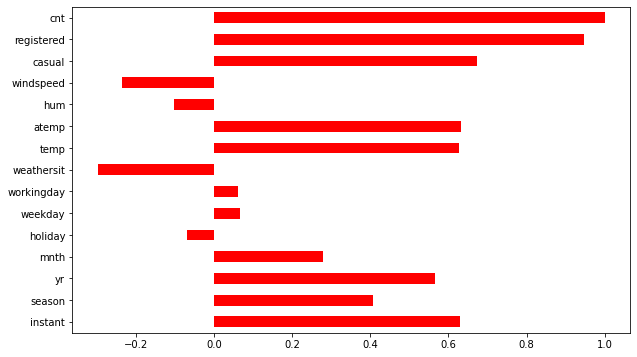

In [66]:
plt.figure(figsize=(10,6))
CORREL['cnt'].plot(kind='barh', color='red')

<AxesSubplot:>

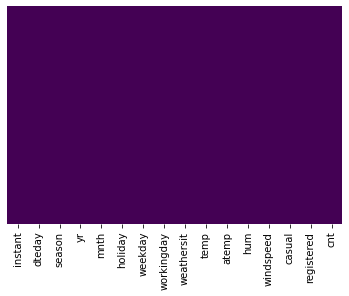

In [67]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [68]:
data = data.dropna(how='any')
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [69]:
print(data.dtypes)
data.head(3)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [70]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [71]:
dummy_fields = ['season', 'weathersit', 'mnth', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(data[each], prefix=each, drop_first=False)
    data = pd.concat([data, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday',]
data = data.drop(fields_to_drop, axis=1)
data.head()

feature_scaling_store = {}

for feature in ['cnt', 'temp', 'hum', 'windspeed']:
  mean, std = data[feature].mean(), data[feature].std()
  feature_scaling_store[feature] = [mean, std]
  data.loc[:, feature] = (data[feature] - mean) / std

data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-0.826097,1.249316,-0.387626,331,654,-1.816709,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-0.720601,0.478785,0.749089,131,670,-1.911691,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,-1.633538,-1.338358,0.746121,120,1229,-1.628810,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,-1.613675,-0.263001,-0.389562,108,1454,-1.518858,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,-1.466410,-1.340576,-0.046275,82,1518,-1.499242,1,0,...,0,0,0,0,0,0,1,0,0,0


In [73]:
data.shape

(731, 34)